In [18]:
#Gayathri K
#2011067
#P452 Midsem


import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import library_midsem as lib

In [19]:
#Gayathri K
#2011067
#P452 Midsem
#q4

def f(x):
    return x**2
def g(x):
    return x**3

#limits of integration
a = 0
b = 2

#step size
N = 20

#integrate the mass density over length
M=lib.simpsons_rule(f,a,b,N)
print("mass = ",M)
XM=lib.simpsons_rule(g,a,b,N)

com=XM/M
print(f"Center of mass is at {com:.4f} units from the end.")


mass =  2.666666666666668
Center of mass is at 1.5000 units from the end.


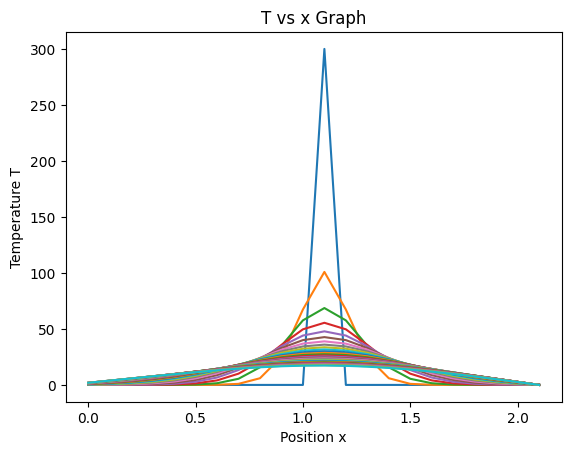

In [16]:
#Gayathri K
#2011067
#P452 Midsem
#q3


import library_midsem as lib
import numpy as np
import matplotlib.pyplot as plt



def f(x):
    x = round(x, 6)
    if x==1:
        return 300
    else:
        return 0   


nx=20    #position grid
nt=3000 #time grid
lx=2  
lt=4
xs=[]
T_step=0
#
p=lib.pde_explicit(f,20,5000,2,4,T_step) # sample output
for i in range(len(p)): #building x array
    xs.append(i*lx/nx)
while T_step<300:
    t=lib.pde_explicit(f,20,5000,2,4,T_step)  # solving for every 10 timestep
    plt.plot(xs,t)
    T_step+=10
plt.xlabel('Position x')    
plt.ylabel('Temperature T')
plt.title('T vs x Graph')
plt.show()   



The x position at which T=100 deg C: 4.42499999999995 m


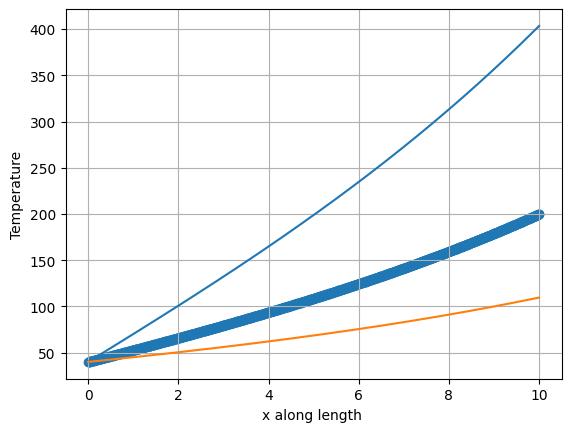

In [15]:
#Gayathri K
#2011067
#P452 Midsem
#q2
#RK4 for heat equation
def Coupled(y0,z0,dzdx,dTdx):
    dx = 0.01
    T, z, x = [], [], []
    T.append(y0)
    z.append(z0)
    x.append(0)
    for i in range(1000):
        k1T=(dx*dTdx(z[i],x[i]))
        k1z=(dx*dzdx(T[i],z[i],x[i]))
        
        k2T=(dx*dTdx((z[i]+k1z/2),(x[i]+dx/2)))
        k2z=(dx*dzdx((T[i]+k1T/2),z[i]+k1z/2,(x[i]+dx/2)))
        
        k3T=(dx*dTdx((z[i]+k2z/2),(x[i]+dx/2)))
        k3z=(dx*dzdx((T[i]+k2T/2),z[i]+k1z/2,(x[i]+dx/2)))
        
        k4T=(dx*dTdx((z[i]+k2z),(x[i]+dx)))
        k4z=( dx*dzdx((T[i]+k2T),z[i]+k1z,(x[i]+dx)))
        
        T.append( T[i] + (k1T + 2*k2T + 2*k3T + k4T)/6)
        z.append(z[i] + (k1z + 2*k2z + 2*k3z + k4z)/6)
        x.append(x[i]+dx)
      
    return T, x

def shooting(zz_h,al,be,dzdx,dTdx):
    e = 0.0001
    T_zz_h,x = Coupled(al,zz_h,dzdx,dTdx)
    plt.plot(x,T_zz_h)
    zz_l=5
    T_zz_l,x = Coupled(al,zz_l,dzdx,dTdx)
    plt.plot(x,T_zz_l)

    if abs(zz_l-be)>e:
        l=len(T_zz_l)-1
        zz_l=zz_l + (zz_h - zz_l)*(be-T_zz_l[l])/(T_zz_h[l]-T_zz_l[l])
        T_zz_h=T_zz_l
        T_zz_l,x = Coupled(al,zz_l,dzdx,dTdx)
    return T_zz_l,x,zz_l
#dzdx
def dzdx(T,z,x):
    return 0.01*(T-20)

#dydx
def dTdx(z,x):
    return z
#Answer to Q2

al,be = 40, 200 #boundary conditions 
T,x,zz=shooting(30,al,be,dzdx,dTdx)
n, sum=0,0

#taking average of all values that lie in the vicinity of 99.9<T<100.1
for i in range(len(T)):
    if abs(100-T[i])<0.1:
        sum=sum+x[i]
        n+=1
print("The x position at which T=100 deg C:", sum/n, "m")
plt.grid()
plt.xlabel("x along length ")
plt.ylabel("Temperature")
plt.scatter(x,T)
plt.show()



In [14]:
#q1
#Gayathri K
#2011067
#P452 Midsem
import library_midsem as lib
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt
tolerance = 1e-6
initial_guess_interval = [1.5, 2.5]

a = initial_guess_interval[0]
b = initial_guess_interval[1]

def f(x):
    return np.log(x/2) - np.sin(5*x/2)

def df(x):
    return 1/(x) - (5/2)*np.cos(5*x/2)

print("OUTPUT\n------")
print(f"Regula Falsi method: initial guess interval = [{a}, {b}]")
root1, step1 = lib.root_regulafalsi(f, a, b, epsilon=tolerance, delta=tolerance)
print(f"Root by Regula Falsi {root1} by {step1 + 2} steps")
print(f"Newton Raphson method: initial guess = {a}")
root2, step2 = lib.root_newtonraphson(f, df, a, epsilon=tolerance, delta=tolerance)
print(f"Root by Newton Raphson method = {root2} in {step2} steps")




OUTPUT
------
Regula Falsi method: initial guess interval = [1.5, 2.5]
Root by Regula Falsi 1.4019299318447522 by 10 steps
Newton Raphson method: initial guess = 1.5
Root by Newton Raphson method = 1.4019299316146128 in 4 steps


In [13]:
#q5
#Gayathri K
#2011067
#P452 Midsem5
import library_midsem as lib
A=[[1,-1,4,0,2,9],[0,5,-2,7,8,4],[1,0,5,7,3,-2],[6,-1,2,3,0,8],[-4,2,0,5,-5,3],[0,7,-1,5,4,-2]]
B=[[19],[2],[13],[-7],[-9],[2]]




    
L=lib.lu_dec(A)
L1=lib.for_back_LU(L,B)
print('using LU-Decomposition [a1,a2,a3,a4,a5,a6]=', L1)


using LU-Decomposition [a1,a2,a3,a4,a5,a6]= [[-1.761817043997862], [0.8962280338740133], [4.051931404116158], [-1.6171308025395421], [2.041913538501913], [0.15183248715593525]]
